In [261]:
#https://www.kaggle.com/m0hammednasser/house-prices

# import psycopg2
# import pandas as pd

# #Establishing the connection the database
# conn = psycopg2.connect(
#    database="TestDb", user='postgres', password='Tm1SA!SA!', host='localhost', port= '5432')

# #Creating a cursor object using the cursor() method
# cursor = conn.cursor()

# sql_query = pd.read_sql_query ('''
#                                SELECT
#                                *
#                                FROM house_train
#                                ''', conn)

# train_df = pd.DataFrame(sql_query)

# #Closing the connection
# conn.close()

###############################################################################################################################

import pandas as pd

#Read in the data as data frame
train_df = pd.read_csv('House_train_kaggle.csv')
test_df = pd.read_csv('House_test_kaggle.csv')





In [262]:
#Print out some info on the data set
print(train_df[train_df["LotFrontage"] != 0]["LotFrontage"].mean())
print(train_df[train_df["LotFrontage"] != 0]["LotFrontage"].median())
print(train_df.info())
print(train_df.head())
print(train_df.describe().T)
print(train_df.isna().sum().sort_values(ascending=False)[:60])

70.04995836802665
69.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exte

In [270]:
#Function is specific to the Kaggle house prices data set.
#Normaliz & standardize(not in the statistical sense) the data
#We are just going to replace the values in the dataframe because we can always just reread the data.


def Replace_NA(df):
    
    #PoolQC is the pool quality if NA then there is not a pool.
    df.PoolQC.fillna("none",inplace=True)

    #MiscFeature is Miscellaneous feature and if NA then there are none.
    df.MiscFeature.fillna("none",inplace=True)

    #Alley should be none if NA.
    df.Alley.fillna("none",inplace=True)

    #Fence should be none if NA.
    df.Fence.fillna("none",inplace=True)

    #FireplaceQu is Fireplace quality and if NA then there is not a fireplace.
    df.FireplaceQu.fillna("none",inplace=True)

    #LotFrontage is Linear feet of street connected to property and should be replaaced with a non-zero number.
    #We are going to use the meadian since there could be outlyers. The link below discusses
    #https://stats.stackexchange.com/questions/143700/which-is-better-replacement-by-mean-and-replacement-by-median
    df.LotFrontage.fillna(df[df["LotFrontage"] != 0]["LotFrontage"].median(),inplace=True)

    #All the garage data seems to be consistant with a count of 81, so it is a good assumption that there is no garage.
    #GarageCond is the Garage condition and if NA then there is no garage.
    df.GarageCond.fillna("none",inplace=True)

    #GarageType is Garage location and if NA then there is no garage.
    df.GarageType.fillna("none",inplace=True)

    #GarageYrBlt is the Year garage was built and if NA then there is no garage.
    df.GarageYrBlt.fillna("none",inplace=True)

    #GarageFinish is the Interior finish of the garage and if NA then there is no garage.
    df.GarageFinish.fillna("none",inplace=True)

    #GarageQual is the Garage quality and if NA then there is no garage.
    df.GarageQual.fillna("none",inplace=True)

    #BsmtExposure Refers to walkout or garden level walls and if NA than there is no basement.
    df.BsmtExposure.fillna("none",inplace=True)

    #BsmtFinType2 is the Rating of basement finished area (if multiple types) and if NA than there is no basement.
    df.BsmtFinType2.fillna("none",inplace=True)

    #BsmtFinType1 is the Rating of basement finished area and if NA than there is no basement.
    df.BsmtFinType1.fillna("none",inplace=True)

    #BsmtCond Evaluates the general condition of the basement and if NA than there is no basement.
    df.BsmtCond.fillna("none",inplace=True)

    #BsmtQual Evaluates the height of the basement and if NA than there is no basement.
    df.BsmtQual.fillna("none",inplace=True)

    #MasVnrArea is the Masonry veneer area in square feet and I think it is likely that NA=0.
    df.MasVnrArea.fillna(0,inplace=True)

    #MasVnrType is Masonry veneer type and if NA then None.
    df.MasVnrType.fillna("none",inplace=True)

    #Electrical is the Electrical system and if NA then the best assumption is SBrkr.
    #This would only be an exceptable assumption in the US where this very standatd.
    df.Electrical.fillna("SBrkr",inplace=True)
    
    if sum(train_df.isna().sum()) == 0:
        print('Success! There is no missing data.')
    else:
        print('oh no we have some problems. There is missing data.')

In [271]:
Replace_NA(train_df)

Success! There is no missing data.


In [315]:
#Function is specific to the Kaggle house prices data set.
#One-Hot Encoding
#Did not use the sklearn OneHotEncoder because it does not accept strings

def OH_Encod(df):
    cat_columns = df.select_dtypes(include = ['object']).columns
    num_columns = df.select_dtypes(exclude = ['object']).columns.drop(['SalePrice','Id'])

    OneHot_df = pd.get_dummies(df, columns=cat_columns)
    
    return(OneHot_df)

In [316]:
clean_train_df = OH_Encod(train_df)

In [317]:
# #We can use this as a template to check the work above
# print(df[df["LotFrontage"] == 69.0]["LotFrontage"].count())


corr_mx = clean_train_df.corr()
Top_corrs = corr_mx[(corr_mx['SalePrice'] < -0.5) | (corr_mx['SalePrice'] > 0.5)]['SalePrice']

print(Top_corrs)

OverallQual       0.790982
YearBuilt         0.522897
YearRemodAdd      0.507101
TotalBsmtSF       0.613581
1stFlrSF          0.605852
GrLivArea         0.708624
FullBath          0.560664
TotRmsAbvGrd      0.533723
GarageCars        0.640409
GarageArea        0.623431
SalePrice         1.000000
ExterQual_TA     -0.589044
BsmtQual_Ex       0.553105
KitchenQual_Ex    0.504094
KitchenQual_TA   -0.519298
Name: SalePrice, dtype: float64


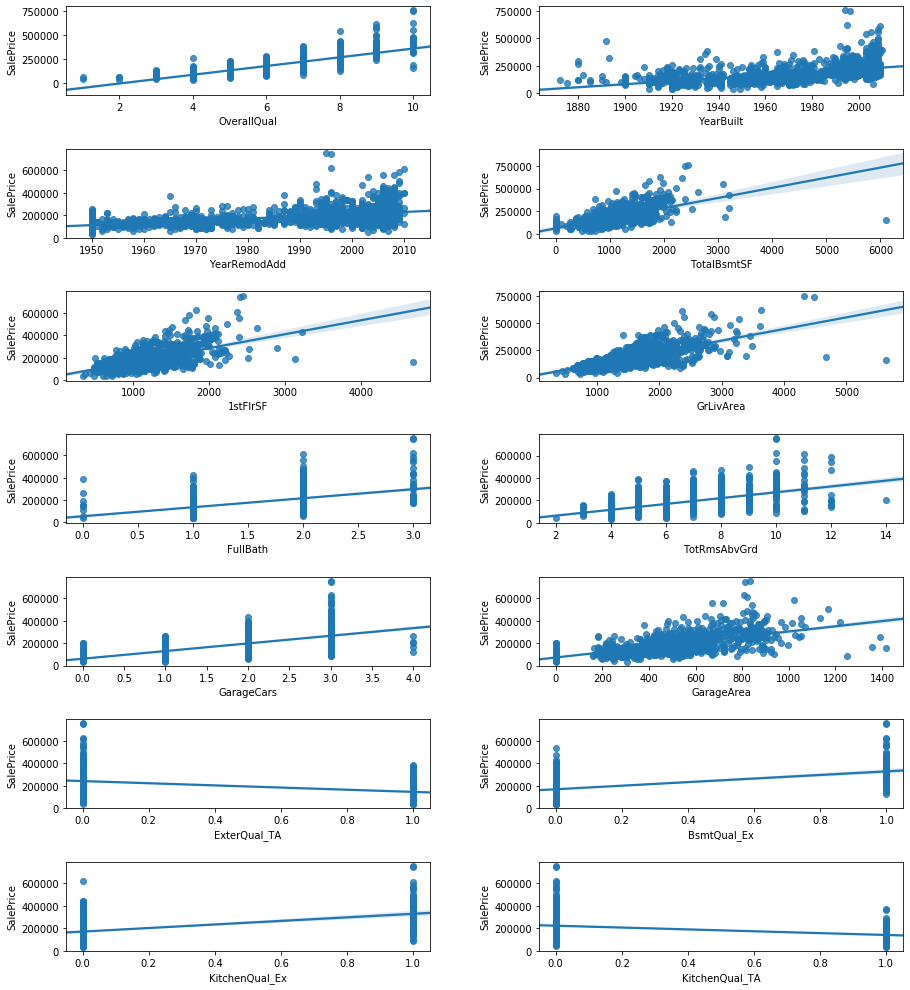

In [318]:
import seaborn as sns
import matplotlib.pyplot as plt

i = 1
plt.figure(figsize=(15, 20))
plt.subplots_adjust(hspace=.6 ,wspace = .3)

for var in Top_corrs.index:
    if var not in ['SalePrice']:
        plt.subplot(round(len(Top_corrs)/2),2,i)
        sns.regplot(data = clean_train_df[Top_corrs.index], x = clean_train_df[Top_corrs.index][var], y = clean_train_df[Top_corrs.index].SalePrice )
        i+=1

In [360]:
# Load packages/libraries
import numpy as np
from sklearn.model_selection import train_test_split


X_clean_df = clean_train_df.drop(["SalePrice",'Id'], axis=1)
y_clean_df = clean_train_df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X_clean_df, y_clean_df, test_size=0.33, random_state=42)


In [363]:
import sklearn
import xgboost
from sklearn import linear_model
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import LinearSVR
from xgboost import XGBRegressor

# Construct a linear model
lin_reg = sklearn.linear_model.LinearRegression()
lin_reg.fit(X_train, y_train)

sgd_reg = SGDRegressor(max_iter=100000, tol=1e-3, penalty=None, random_state=42, eta0=0.08)
sgd_reg.fit(X_train, y_train)

Lasso_reg = Lasso(max_iter=100000, tol=1e-3, random_state=42)
Lasso_reg.fit(X_train, y_train)

ENet = ElasticNet(max_iter=1000000, tol=1e-3, random_state=42)
ENet.fit(X_train, y_train)

Lin_SVR = LinearSVR(max_iter=1000000, tol=1e-3, random_state=42)
Lin_SVR.fit(X_train, y_train)

XGBR = XGBRegressor(colsample_bytree=0.2,
                    gamma=0.0,
                    learning_rate=0.01,
                    max_depth=4,
                    min_child_weight=1.5,
                    n_estimators=7200,
                    reg_alpha=0.9,
                    reg_lambda=0.6,
                    subsample=0.2
                   )
XGBR.fit(X_train, y_train)



XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.2, enable_categorical=False,
             gamma=0.0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=4, min_child_weight=1.5, missing=nan,
             monotone_constraints='()', n_estimators=7200, n_jobs=12,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0.9, reg_lambda=0.6,
             scale_pos_weight=1, subsample=0.2, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [364]:
import sklearn
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

lin_reg_y_pred = lin_reg.predict(X_test)
sgd_y_pred = sgd_reg.predict(X_test)
Lasso_reg_y_pred = Lasso_reg.predict(X_test)
ENet_y_pred = ENet.predict(X_test)
Lin_SVR_y_pred = Lin_SVR.predict(X_test)
XGBR_y_pred = XGBR.predict(X_test)


print('Mean Absolute Error(lin_reg):', mean_absolute_error(y_test, lin_reg_y_pred))
print('Mean Absolute Error(sgd):', mean_absolute_error(y_test, sgd_y_pred))
print('Mean Absolute Error(Lasso_reg):', mean_absolute_error(y_test, Lasso_reg_y_pred))
print('Mean Absolute Error(ENet):', mean_absolute_error(y_test, ENet_y_pred))
print('Mean Absolute Error(Lin_SVR):', mean_absolute_error(y_test, Lin_SVR_y_pred))
print('Mean Absolute Error(XGBR):', mean_absolute_error(y_test, XGBR_y_pred))
print()
print('Mean Squared Error(lin_reg):', mean_squared_error(y_test, lin_reg_y_pred))
print('Mean Squared Error(sgd):', mean_squared_error(y_test, sgd_y_pred))
print('Mean Squared Error(Lasso_reg):', mean_squared_error(y_test, Lasso_reg_y_pred))
print('Mean Squared Error(ENet):', mean_squared_error(y_test, ENet_y_pred))
print('Mean Squared Error(Lin_SVR):', mean_squared_error(y_test, Lin_SVR_y_pred))
print('Mean Squared Error(XGBR):', mean_squared_error(y_test, XGBR_y_pred))
print()
print('Root Mean Squared Error(lin_reg):', np.sqrt(mean_squared_error(y_test, lin_reg_y_pred)))
print('Root Mean Squared Error(sgd):', np.sqrt(mean_squared_error(y_test, sgd_y_pred)))
print('Root Mean Squared Error(Lasso_reg):', np.sqrt(mean_squared_error(y_test, Lasso_reg_y_pred)))
print('Root Mean Squared Error(ENet):', np.sqrt(mean_squared_error(y_test, ENet_y_pred)))
print('Root Mean Squared Error(Lin_SVR):', np.sqrt(mean_squared_error(y_test, Lin_SVR_y_pred)))
print('Root Mean Squared Error(XGBR):', np.sqrt(mean_squared_error(y_test, XGBR_y_pred)))


Mean Absolute Error(lin_reg): 48415996.22777694
Mean Absolute Error(sgd): 1.280161582544561e+18
Mean Absolute Error(Lasso_reg): 19591.325642791457
Mean Absolute Error(ENet): 21021.326025836006
Mean Absolute Error(Lin_SVR): 23482.835803548925
Mean Absolute Error(XGBR): 15328.886297328838

Mean Squared Error(lin_reg): 1.1497895593140341e+17
Mean Squared Error(sgd): 2.3776909489810656e+36
Mean Squared Error(Lasso_reg): 954012304.2870995
Mean Squared Error(ENet): 1422998718.067571
Mean Squared Error(Lin_SVR): 1604620499.4081993
Mean Squared Error(XGBR): 858930744.6176118

Root Mean Squared Error(lin_reg): 339085469.95028174
Root Mean Squared Error(sgd): 1.5419763127172434e+18
Root Mean Squared Error(Lasso_reg): 30887.08960532053
Root Mean Squared Error(ENet): 37722.65523617831
Root Mean Squared Error(Lin_SVR): 40057.71460540652
Root Mean Squared Error(XGBR): 29307.520274114147


In [365]:
Small_X_clean_df = clean_train_df[["OverallQual","YearBuilt","YearRemodAdd","TotalBsmtSF","1stFlrSF","GrLivArea","FullBath","TotRmsAbvGrd","GarageCars","GarageArea","ExterQual_TA","BsmtQual_Ex","KitchenQual_Ex","KitchenQual_TA"]]
Small_y_clean_df = clean_train_df["SalePrice"]

SX_train, SX_test, Sy_train, Sy_test = train_test_split(Small_X_clean_df, Small_y_clean_df, test_size=0.33, random_state=42)

In [369]:
import sklearn
import xgboost
from sklearn import linear_model
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import LinearSVR
from xgboost import XGBRegressor

# Construct a linear model
Slin_reg = sklearn.linear_model.LinearRegression()
Slin_reg.fit(SX_train, Sy_train)

Ssgd_reg = SGDRegressor(max_iter=100000, tol=1e-3, penalty=None, random_state=42, eta0=0.08)
Ssgd_reg.fit(SX_train, Sy_train)

SLasso_reg = Lasso(max_iter=100000, tol=1e-3, random_state=42)
SLasso_reg.fit(SX_train, Sy_train)

SENet = ElasticNet(max_iter=1000000, tol=1e-3, random_state=42)
SENet.fit(SX_train, Sy_train)

SLin_SVR = LinearSVR(max_iter=1000000, tol=1e-3, random_state=42)
SLin_SVR.fit(SX_train, Sy_train)

SXGBR = XGBRegressor(colsample_bytree=0.2,
                    gamma=0.0,
                    learning_rate=0.01,
                    max_depth=4,
                    min_child_weight=1.5,
                    n_estimators=7200,
                    reg_alpha=0.9,
                    reg_lambda=0.6,
                    subsample=0.2
                   )
SXGBR.fit(SX_train, Sy_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.2, enable_categorical=False,
             gamma=0.0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=4, min_child_weight=1.5, missing=nan,
             monotone_constraints='()', n_estimators=7200, n_jobs=12,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0.9, reg_lambda=0.6,
             scale_pos_weight=1, subsample=0.2, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [370]:
import sklearn
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

Slin_reg_y_pred = Slin_reg.predict(SX_test)
Ssgd_y_pred = Ssgd_reg.predict(SX_test)
SLasso_reg_y_pred = SLasso_reg.predict(SX_test)
SENet_y_pred = SENet.predict(SX_test)
SLin_SVR_y_pred = SLin_SVR.predict(SX_test)
SXGBR_y_pred = SXGBR.predict(SX_test)


print('small Mean Absolute Error(lin_reg):', mean_absolute_error(Sy_test, Slin_reg_y_pred))
print('small Mean Absolute Error(sgd):', mean_absolute_error(Sy_test, Ssgd_y_pred))
print('small Mean Absolute Error(Lasso_reg):', mean_absolute_error(Sy_test, SLasso_reg_y_pred))
print('small Mean Absolute Error(ENet):', mean_absolute_error(Sy_test, SENet_y_pred))
print('small Mean Absolute Error(Lin_SVR):', mean_absolute_error(Sy_test, SLin_SVR_y_pred))
print('small Mean Absolute Error(XGBR):', mean_absolute_error(Sy_test, SXGBR_y_pred))
print()
print('small Mean Squared Error(lin_reg):', mean_squared_error(Sy_test, Slin_reg_y_pred))
print('small Mean Squared Error(sgd):', mean_squared_error(Sy_test, Ssgd_y_pred))
print('small Mean Squared Error(Lasso_reg):', mean_squared_error(Sy_test, SLasso_reg_y_pred))
print('small Mean Squared Error(ENet):', mean_squared_error(Sy_test, SENet_y_pred))
print('small Mean Squared Error(Lin_SVR):', mean_squared_error(Sy_test, SLin_SVR_y_pred))
print('small Mean Squared Error(XGBR):', mean_squared_error(Sy_test, SXGBR_y_pred))
print()
print('small Root Mean Squared Error(lin_reg):', np.sqrt(mean_squared_error(Sy_test, Slin_reg_y_pred)))
print('small Root Mean Squared Error(sgd):', np.sqrt(mean_squared_error(Sy_test, Ssgd_y_pred)))
print('small Root Mean Squared Error(Lasso_reg):', np.sqrt(mean_squared_error(Sy_test, SLasso_reg_y_pred)))
print('small Root Mean Squared Error(ENet):', np.sqrt(mean_squared_error(Sy_test, SENet_y_pred)))
print('small Root Mean Squared Error(Lin_SVR):', np.sqrt(mean_squared_error(Sy_test, SLin_SVR_y_pred)))
print('small Root Mean Squared Error(XGBR):', np.sqrt(mean_squared_error(Sy_test, SXGBR_y_pred)))


small Mean Absolute Error(lin_reg): 22636.55449832993
small Mean Absolute Error(sgd): 3.0965775250444256e+16
small Mean Absolute Error(Lasso_reg): 22635.57258408639
small Mean Absolute Error(ENet): 23553.585021459145
small Mean Absolute Error(Lin_SVR): 28357.708923429203
small Mean Absolute Error(XGBR): 21189.68862649118

small Mean Squared Error(lin_reg): 1301203164.3313847
small Mean Squared Error(sgd): 1.0534276125021476e+33
small Mean Squared Error(Lasso_reg): 1301190031.060714
small Mean Squared Error(ENet): 1496750368.6348782
small Mean Squared Error(Lin_SVR): 1938144909.0660021
small Mean Squared Error(XGBR): 1152177690.8864107

small Root Mean Squared Error(lin_reg): 36072.19378318131
small Root Mean Squared Error(sgd): 3.2456549608702212e+16
small Root Mean Squared Error(Lasso_reg): 36072.01174124773
small Root Mean Squared Error(ENet): 38687.85815517419
small Root Mean Squared Error(Lin_SVR): 44024.36721937071
small Root Mean Squared Error(XGBR): 33943.74302999613
